In [ ]:
#Objectif : créer une base qui regroupe les données sur la représentation politique des femmes
#Données récupérées sur le site de l'union interparlementaire : https://data.ipu.org/fr/women-ranking?month=11&year=2021

In [58]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import bs4
import pandas
from urllib import request
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

# Création de la base de données Représentation Politique

## Données sur la proportion de femmes au parlement par pays (en fonction de la chambre)

In [87]:
df_percent_women = pd.read_csv('C:/Users/gadole/Documents/cours/Ensae/2A/python/projet/RP/chamber--current_women_percent.csv', sep=',', encoding='utf-8')
df_percent_women.head()

,Source: Inter-Parliamentary Union Open Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Date: 2021-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Classement au 1er Novembre 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Classement,Pays,Chambre basse ou unique,NaN,NaN,NaN,Chambre haute,NaN,NaN,NaN
4,NaN,NaN,Elections,Sièges,Femmes,% W,Elections,Sièges,Femmes,% W


In [88]:
df_percent_women = df_percent_women.iloc[3: , : ]
df_percent_women.drop(df_percent_women.columns[[0]], axis=1, inplace=True)
df_percent_women.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
3,Pays,Chambre basse ou unique,NaN,NaN,NaN,Chambre haute,NaN,NaN,NaN
4,NaN,Elections,Sièges,Femmes,% W,Elections,Sièges,Femmes,% W
5,Rwanda,09.2018,80,49,61.3,09.2019,26,10,38.5
6,Cuba,03.2018,586,313,53.4,-,-,-,-
7,Nicaragua,11.2016,91,46,50.6,-,-,-,-


In [89]:
df_percent_women.columns = ["Country", "Elections (lower house)", "Seats", "Women", "Women proportion (lower house)", "Elections (upper house)", "Seats", "Women", "Women proportion (upper house)"]
df_percent_women = df_percent_women.iloc[2: , : ]
df_percent_women.reset_index(inplace=True, drop=True)
df_percent_women.head()

,Country,Elections (lower house),Seats,Women,Women proportion (lower house),Elections (upper house),Seats,Women,Women proportion (upper house)
0,Rwanda,09.2018,80,49,61.3,09.2019,26,10,38.5
1,Cuba,03.2018,586,313,53.4,-,-,-,-
2,Nicaragua,11.2016,91,46,50.6,-,-,-,-
3,Emirats arabes unis,10.2019,40,20,50,-,-,-,-
4,Mexique,06.2021,500,250,50,07.2018,128,63,49.2


In [90]:
#On ne conserve que les colonnes utiles 
df_percent_women2 = df_percent_women[["Country", "Women proportion (lower house)", "Women proportion (upper house)"]]
df_percent_women2

,Country,Women proportion (lower house),Women proportion (upper house)
0,Rwanda,61.3,38.5
1,Cuba,53.4,-
2,Nicaragua,50.6,-
3,Emirats arabes unis,50,-
4,Mexique,50,49.2
...,...,...,...
188,Vanuatu,0,-
189,Yémen,0,1.1
190,Erythrée,-,-
191,Haïti,-,0


## Données sur l'existence de quota électoraux concernant les femmes

In [91]:
df_quota = pd.read_csv('C:/Users/gadole/Documents/cours/Ensae/2A/python/projet/RP/chamber--field_is_electoral_quota_women.csv', sep=',', encoding='utf-8')
df_quota.head()

,Source : base de données Parline sur les parlements nationaux (https://data.ipu.org).,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Droit d'auteur : Union interparlementaire. Con...,NaN,NaN,NaN,NaN,NaN,NaN
1,Champ sélectionné : Quota électoral de femmes,NaN,NaN,NaN,NaN,NaN,NaN
2,Année de référence : 2021,NaN,NaN,NaN,NaN,NaN,NaN
3,Exported on: 2021-12-27,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
def nettoyage(df, d, l):
    #df est le data frame
    #d représente l'indice des colonnes à supprimer
    #l représente l'indice de lignes à partir duquel il convient de conserver les données
    df = df.drop(df.columns[d], axis=1) #On supprime les colonnes vides
    df = df.iloc[l: , : ] #On conserve les lignes comportant les noms des colonnes et les données
    df.columns = df.iloc[0] #On renomme les colonnes
    df.reset_index(inplace=True, drop=True) 
    df = df.iloc[pd.RangeIndex(len(df)).drop(0)] 
    df.reset_index(inplace=True, drop=True)
    return df

In [93]:
df_quota = nettoyage(df_quota, 6, 5)
df_quota.head()

5,Code ISO,Pays,Chambre,Quota électoral de femmes,Structure,Type de chambre
0,AF,Afghanistan,Chambre du peuple,Oui,Bicameral,Chambre basse
1,ZA,Afrique du Sud,Assemblée nationale,Oui,Bicameral,Chambre basse
2,AL,Albanie,Parlement,Oui,Unicameral,NaN
3,DZ,Algérie,Assemblée populaire nationale,Oui,Bicameral,Chambre basse
4,DE,Allemagne,Bundestag allemand,Oui,Bicameral,Chambre basse


In [94]:
df_quota.columns = ["2-alpha code", "Country", "House", "Quota", "Structure", "House type"]
df_quota.head()

,2-alpha code,Country,House,Quota,Structure,House type
0,AF,Afghanistan,Chambre du peuple,Oui,Bicameral,Chambre basse
1,ZA,Afrique du Sud,Assemblée nationale,Oui,Bicameral,Chambre basse
2,AL,Albanie,Parlement,Oui,Unicameral,NaN
3,DZ,Algérie,Assemblée populaire nationale,Oui,Bicameral,Chambre basse
4,DE,Allemagne,Bundestag allemand,Oui,Bicameral,Chambre basse


In [95]:
df_quota2 = df_quota[["2-alpha code", "Country", "Quota"]]
df_quota2

,2-alpha code,Country,Quota
0,AF,Afghanistan,Oui
1,ZA,Afrique du Sud,Oui
2,AL,Albanie,Oui
3,DZ,Algérie,Oui
4,DE,Allemagne,Oui
...,...,...,...
185,VE,Venezuela (République bolivarienne du),Oui
186,VN,Viet Nam,Non
187,YE,Yémen,Non
188,ZM,Zambie,Non


## Existence d'un organe spécialisé sur la question de l'égalité des sexes

In [96]:
df_spe_body = pd.read_csv('C:/Users/gadole/Documents/cours/Ensae/2A/python/projet/RP/chamber--specialized_body__women.csv', sep=',', encoding='utf-8')
df_spe_body.head()

,Source : base de données Parline sur les parlements nationaux (https://data.ipu.org).,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Droit d'auteur : Union interparlementaire. Con...,NaN,NaN,NaN,NaN,NaN,NaN
1,Field name: Organes spécialisés - Egalité des ...,NaN,NaN,NaN,NaN,NaN,NaN
2,Année de référence : 2021,NaN,NaN,NaN,NaN,NaN,NaN
3,Exported on: 2021-12-27,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df_spe_body = nettoyage(df_spe_body, 6, 5)
df_spe_body.head()

5,Code ISO,Pays,Chambre,Organes spécialisés - Egalité des sexes,Structure,Type de chambre
0,AF,Afghanistan,Chambre du peuple,Oui,Bicameral,Chambre basse
1,ZA,Afrique du Sud,Assemblée nationale,Oui,Bicameral,Chambre basse
2,AL,Albanie,Parlement,Oui,Unicameral,NaN
3,DZ,Algérie,Assemblée populaire nationale,Non,Bicameral,Chambre basse
4,DE,Allemagne,Bundestag allemand,Oui,Bicameral,Chambre basse


In [98]:
df_spe_body.columns = ["2-alpha code", "Country", "House", "Specialized body", "Structure", "House type"]
df_spe_body.head()

,2-alpha code,Country,House,Specialized body,Structure,House type
0,AF,Afghanistan,Chambre du peuple,Oui,Bicameral,Chambre basse
1,ZA,Afrique du Sud,Assemblée nationale,Oui,Bicameral,Chambre basse
2,AL,Albanie,Parlement,Oui,Unicameral,NaN
3,DZ,Algérie,Assemblée populaire nationale,Non,Bicameral,Chambre basse
4,DE,Allemagne,Bundestag allemand,Oui,Bicameral,Chambre basse


In [99]:
df_spe_body2 = df_spe_body[["2-alpha code", "Specialized body"]]
df_spe_body2

,2-alpha code,Specialized body
0,AF,Oui
1,ZA,Oui
2,AL,Oui
3,DZ,Non
4,DE,Oui
...,...,...
187,VE,Pas d'information
188,VN,Oui
189,YE,Pas d'information
190,ZM,Oui


# Importation d'une base de données pour permettre la fusion de ces bases

In [100]:
# Pour permettre d'harmoniser les codes pays entre les différentes bases de données
df_country_code = pd.read_csv('C:/Users/gadole/Documents/cours/Ensae/2A/python/projet/WDICountry.csv', sep=',', encoding='utf-8')
df_country_code.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,NaN,Enhanced General Data Dissemination System (e-...,2020 (expected),NaN,NaN,Yes,NaN,NaN,2018.0,NaN
1,AFE,Africa Eastern and Southern,Africa Eastern and Southern,Africa Eastern and Southern,ZH,NaN,"26 countries, stretching from the Red Sea in t...",NaN,NaN,ZH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,NaN
3,AFW,Africa Western and Central,Africa Western and Central,Africa Western and Central,ZI,NaN,"22 countries, stretching from the westernmost ...",NaN,NaN,ZI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NaN,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-...,2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NaN,NaN,NaN,2018.0,NaN


In [101]:
df_country_code2 = df_country_code[["Country Code", "2-alpha code"]]
df_country_code2

,Country Code,2-alpha code
0,ABW,AW
1,AFE,ZH
2,AFG,AF
3,AFW,ZI
4,AGO,AO
...,...,...
260,XKX,XK
261,YEM,YE
262,ZAF,ZA
263,ZMB,ZM


# Traitement des données de la banque mondiale

In [178]:
df = pd.read_csv('C:/Users/gadole/Documents/cours/Ensae/2A/python/projet/WDIData.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.320475,16.643243,16.994695,17.313168,17.604950,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.224027,32.046478,31.323579,33.312163,38.380433,39.754201,42.168241,43.640661,NaN,NaN
2,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.525353,19.461383,17.790698,16.553470,23.907897,24.624725,26.813900,28.841150,NaN,NaN
3,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,66.303599,66.496010,65.828988,66.926692,68.722184,71.085418,71.994933,73.589886,NaN,NaN
4,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df_bm2=df[["Country Code", "Indicator Name", "2019"]]
df_bm3=df_bm2[df_bm2['Indicator Name']=="GDP per capita (constant 2015 US$)"]
df_bm3.head()

,Country Code,Indicator Name,2019
469,AFE,GDP per capita (constant 2015 US$),1499.256275
1912,AFW,GDP per capita (constant 2015 US$),1843.558468
3355,ARB,GDP per capita (constant 2015 US$),6206.570758
4798,CSS,GDP per capita (constant 2015 US$),10050.327615
6241,CEB,GDP per capita (constant 2015 US$),14823.026908


# On fusionne les bases de données

In [179]:
df_rp_gdp = df_quota2.merge(df_country_code2, on='2-alpha code', how='left')
df_rp_gdp = df_rp_gdp.merge(df_spe_body2, on='2-alpha code', how='left')
df_rp_gdp = df_rp_gdp.merge(df_percent_women2, on='Country', how='left')
df_rp_gdp = df_rp_gdp.merge(df_bm3, on='Country Code', how='left')
df_rp_gdp = df_rp_gdp.drop(df_rp_gdp.columns[0], axis=1)
df_rp_gdp

,Country,Quota,Country Code,Specialized body,Women proportion (lower house),Women proportion (upper house),Indicator Name,2019
0,Afghanistan,Oui,AFG,Oui,27,27.9,GDP per capita (constant 2015 US$),577.563058
1,Afrique du Sud,Oui,ZAF,Oui,46.4,41.5,GDP per capita (constant 2015 US$),5574.643890
2,Albanie,Oui,ALB,Oui,35.7,-,GDP per capita (constant 2015 US$),4549.457441
3,Algérie,Oui,DZA,Non,8.1,5.7,GDP per capita (constant 2015 US$),4111.306192
4,Allemagne,Oui,DEU,Oui,34.9,33.3,GDP per capita (constant 2015 US$),43311.628981
...,...,...,...,...,...,...,...,...
186,Venezuela (République bolivarienne du),Oui,VEN,Pas d'information,22.2,-,GDP per capita (constant 2015 US$),NaN
187,Viet Nam,Non,VNM,Oui,30.3,-,GDP per capita (constant 2015 US$),2604.224166
188,Yémen,Non,YEM,Pas d'information,0,1.1,GDP per capita (constant 2015 US$),NaN
189,Zambie,Non,ZMB,Oui,15.1,-,GDP per capita (constant 2015 US$),1348.743220


In [180]:
def replace_column(df, col_name, L_old_value, L_new_value) :
    for i in range(len(L_old_value)) :
        df[col_name] = df[col_name].replace(L_old_value[i], L_new_value[i])
    return df
    

In [181]:
replace_column(df_rp_gdp, "Quota", ['Oui', 'Non', "Pas d'information"], [1, 0, np.nan])
replace_column(df_rp_gdp, "Specialized body", ['Oui', 'Non', "Pas d'information"], [1, 0, np.nan])
replace_column(df_rp_gdp, "Women proportion (lower house)", ['-'], [np.nan])
replace_column(df_rp_gdp, "Women proportion (upper house)", ['-'], [np.nan])

,Country,Quota,Country Code,Specialized body,Women proportion (lower house),Women proportion (upper house),Indicator Name,2019
0,Afghanistan,1,AFG,1.0,27,27.9,GDP per capita (constant 2015 US$),577.563058
1,Afrique du Sud,1,ZAF,1.0,46.4,41.5,GDP per capita (constant 2015 US$),5574.643890
2,Albanie,1,ALB,1.0,35.7,NaN,GDP per capita (constant 2015 US$),4549.457441
3,Algérie,1,DZA,0.0,8.1,5.7,GDP per capita (constant 2015 US$),4111.306192
4,Allemagne,1,DEU,1.0,34.9,33.3,GDP per capita (constant 2015 US$),43311.628981
...,...,...,...,...,...,...,...,...
186,Venezuela (République bolivarienne du),1,VEN,NaN,22.2,NaN,GDP per capita (constant 2015 US$),NaN
187,Viet Nam,0,VNM,1.0,30.3,NaN,GDP per capita (constant 2015 US$),2604.224166
188,Yémen,0,YEM,NaN,0,1.1,GDP per capita (constant 2015 US$),NaN
189,Zambie,0,ZMB,1.0,15.1,NaN,GDP per capita (constant 2015 US$),1348.743220


In [182]:
df_rp_gdp.to_csv(r'C:/Users/gadole/Documents/cours/Ensae/2A/python/projet/RP/donnees_representation_pol.csv')

# Création de l'indicateur représentation politique

In [148]:
df_rp_gdp.dropna(inplace=True)

In [167]:
X = df_rp_gdp[["Quota", "Specialized body", "Women proportion (upper house)"]]
X = sm.add_constant(X)
y = df_rp_gdp["2019"]

model = sm.OLS(y, X.astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   2019   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     3.652
Date:                Mon, 03 Jan 2022   Prob (F-statistic):             0.0166
Time:                        19:26:22   Log-Likelihood:                -828.47
No. Observations:                  74   AIC:                             1665.
Df Residuals:                      70   BIC:                             1674.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

La variable explicative "Specialized body" semble avoir une influence contre intuitive sur le niveau de développement économique d'un pays.
On retire la variable explicative "Women proportion (upper house)", qui était peu significative en pratique et statistiquement. 
Ici on ne prend en compte que 74 observations au lieu de 191 au départ.
On accorde le poids suivant aux différentes variables : 
 - Existence de quota : 8/11
 - Proportion de femmes dans la chambre haute du parlement : 2/11
 - Existence d'un organe spécialisé : 1/11

In [173]:
df_rp_gdp["Women proportion (upper house)"] = df_rp_gdp["Women proportion (upper house)"].astype(float, errors = 'raise')

In [174]:
df_rp_gdp["Women proportion (upper house)"].dtypes

dtype('float64')

In [175]:
df_rp_gdp["Women proportion (upper house) indicator"] = df_rp_gdp["Women proportion (upper house)"]/df_rp_gdp["Women proportion (upper house)"].max()

In [176]:
df_rp_gdp["Indicateur représentation politique"] = 2/11 * df_rp_gdp["Women proportion (upper house) indicator"] + 1/11 * df_rp_gdp["Specialized body"] + 8/11 * df_rp_gdp["Quota"]

In [170]:
df_rp_gdp[["Country Code", "Indicateur représentation politique"]]

,Country Code,Indicateur représentation politique
0,AFG,0.909418
1,ZAF,0.953891
3,DZA,0.745912
4,DEU,0.927077
7,ATG,0.172989
...,...,...
174,THA,0.852191
178,TTO,0.223676
180,TKM,0.172662
184,URY,0.832897


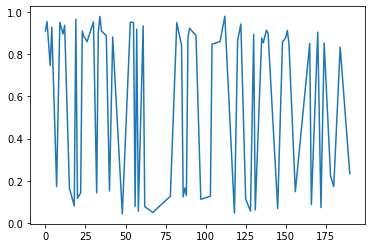

In [177]:
df_rp_gdp["Indicateur représentation politique"].plot()